# Desafio Técnico Indicium - Análise de Dados e Machine Learning

Candidato -> Pedro Nícollas Pereira Leon Lopes

Este Jupyter Notebook apresenta a resolução do desafio técnico proposto para Ciência de Dados, abrangendo desde a análise exploratória dos dados até o desenvolvimento de um modelo preditivo para a nota do IMDB, incluindo as respostas às perguntas específicas.

## 1) Análise Exploratória dos Dados (EDA)

### Carregamento e Pré-processamento dos Dados

Primeiro, vamos carregar o dataset e realizar as etapas de limpeza e pré-processamento necessárias. Isso inclui a conversão de colunas para tipos numéricos e o tratamento de valores ausentes.

In [1]:
# Conjunto de Imports iniciais

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=pd.errors.PerformanceWarning)

In [2]:
# Leitura do dataset

df = pd.read_csv("../data/desafio_indicium_imdb.csv")

In [3]:
# Infos quantidade de linhas e colunas
print(f"Quant. de linhas: {df.shape[0]}")
print(f"Quant. de colunas: {df.shape[1]}")

# Primeiras 5 linhas do dataset (head)
df.head()

Quant. de linhas: 999
Quant. de colunas: 16


,Unnamed: 0,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,1,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
1,2,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
2,3,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
3,4,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"
4,5,The Lord of the Rings: The Return of the King,2003,U,201 min,"Action, Adventure, Drama",8.9,Gandalf and Aragorn lead the World of Men agai...,94.0,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758,"377,845,905"


In [4]:
# Visão geral do Dataframe (Contagem, Nulos e Tipos)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     999 non-null    int64  
 1   Series_Title   999 non-null    object 
 2   Released_Year  999 non-null    object 
 3   Certificate    898 non-null    object 
 4   Runtime        999 non-null    object 
 5   Genre          999 non-null    object 
 6   IMDB_Rating    999 non-null    float64
 7   Overview       999 non-null    object 
 8   Meta_score     842 non-null    float64
 9   Director       999 non-null    object 
 10  Star1          999 non-null    object 
 11  Star2          999 non-null    object 
 12  Star3          999 non-null    object 
 13  Star4          999 non-null    object 
 14  No_of_Votes    999 non-null    int64  
 15  Gross          830 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 125.0+ KB


In [5]:
# Contagem de valores nulos
print(df.isnull().sum())

Unnamed: 0         0
Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64


## Limpeza dos Dados

Nesta etapa, será removida a coluna "Unnamed" pois se trata apenas de um índice que foi carregado junto aos dados. Em seguida, vamos lidar com duplicatas se necessário e com os valores ausentes.

Agora, removerei a coluna "Unnamed: 0", devido a se tratar apenas de uma coluna ÍNDICE.

Abaixo, também realizei a limpeza e pré-processamento dos dados, executando "parsing" de tipos e a remoção dos NANS/NULOS. Como podemos ver abaixo:

In [6]:
df.drop(columns="Unnamed: 0", inplace=True)         # remoção da coluna de ID

In [7]:
# Limpeza e Pré-processamento de Dados
df["Gross"] = df["Gross"].astype(str).str.replace(",", "").astype(float)            # remoção da vírgula e parsing para FLOAT

df["Runtime"] = df["Runtime"].str.replace(" min", "").astype(int)                   # remoção do "min" e parsing para INT

In [8]:
# Remoção de NAN's/Nulos
df["Certificate"] = df["Certificate"].fillna("Unknown")                 # Se nulo -> "Unknown"

df["Meta_score"] = df["Meta_score"].fillna(df["Meta_score"].mean())     # Se nulo -> Media

df["Gross"] = df["Gross"].fillna(df["Gross"].mean())                    # Se nulo -> Media

# Transformação para Numérico (parsing) e remoção de NAN's
df["Released_Year"] = pd.to_numeric(df["Released_Year"], errors="coerce")
df["Gross"] = df["Gross"].dropna()

In [9]:
# Após a limpeza:

print(df.isnull().sum())

Series_Title     0
Released_Year    1
Certificate      0
Runtime          0
Genre            0
IMDB_Rating      0
Overview         0
Meta_score       0
Director         0
Star1            0
Star2            0
Star3            0
Star4            0
No_of_Votes      0
Gross            0
dtype: int64


## Análise Exploratória de Dados - EDA

Abaixo, realizarei a etapa de EDA, onde poderemos observar mais informações sobre o dataset, como Estatísticas Descritivas e plots dos dados:

In [10]:
# Estatísticas Descritivas (count, mean, std, min, max, percentis)
df.describe()

,Released_Year,Runtime,IMDB_Rating,Meta_score,No_of_Votes,Gross
count,998.000000,999.000000,999.000000,999.000000,9.990000e+02,9.990000e+02
mean,1991.214429,122.871872,7.947948,77.969121,2.716214e+05,6.808257e+07
std,23.308539,28.101227,0.272290,11.367570,3.209126e+05,1.000793e+08
min,1920.000000,45.000000,7.600000,28.000000,2.508800e+04,1.305000e+03
25%,1976.000000,103.000000,7.700000,72.000000,5.547150e+04,5.011838e+06
50%,1999.000000,119.000000,7.900000,77.969121,1.383560e+05,4.243830e+07
75%,2009.000000,137.000000,8.100000,85.500000,3.731675e+05,6.808257e+07
max,2020.000000,321.000000,9.200000,100.000000,2.303232e+06,9.366622e+08


### Sobre as estatísticas descritivas:

Com o resultado obtido acima, podemos concluir algumas coisas:

- Os filmes estão entre os anos de 1920 à 2020, segundo as estatísticas de MIN E MAX

- Em média, os filmes possuem 2 horas de duração (122.87 min), segundo o MEAN

- Segundo a estatística de MAX, o filme com maior nota do dataset, possui uma nota de 9.2. E existem filmes que atingiram 100% no MetaScore

### Abaixo, poderemos ver alguns plots, desenvolvidos a partir do Dataset:

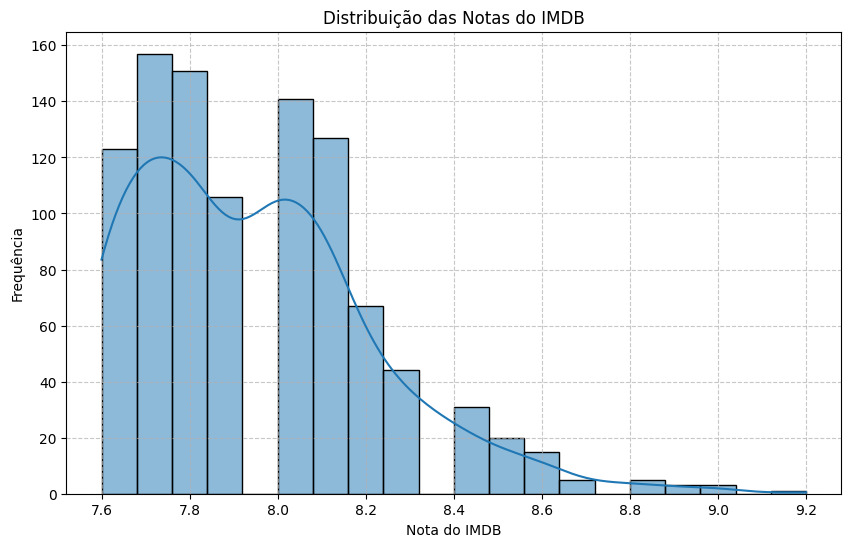

In [11]:
# Plot 1: Distribuição das Notas do IMDB
plt.figure(figsize=(10, 6))
sns.histplot(df["IMDB_Rating"], kde=True)
plt.title("Distribuição das Notas do IMDB")
plt.xlabel("Nota do IMDB")
plt.ylabel("Frequência")
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()

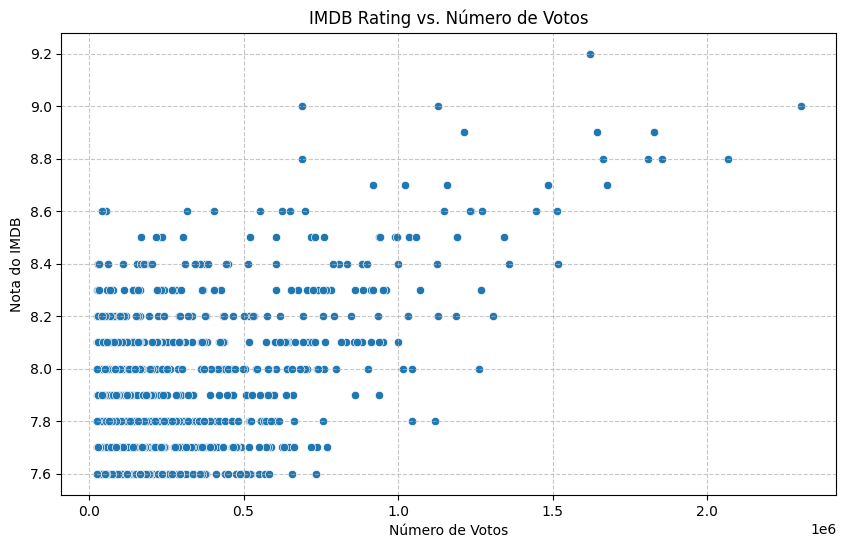

In [12]:
# Plot 2: IMDB Rating vs. Número de Votos
plt.figure(figsize=(10, 6))
sns.scatterplot(x="No_of_Votes", y="IMDB_Rating", data=df)
plt.title("IMDB Rating vs. Número de Votos")
plt.xlabel("Número de Votos")
plt.ylabel("Nota do IMDB")
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()

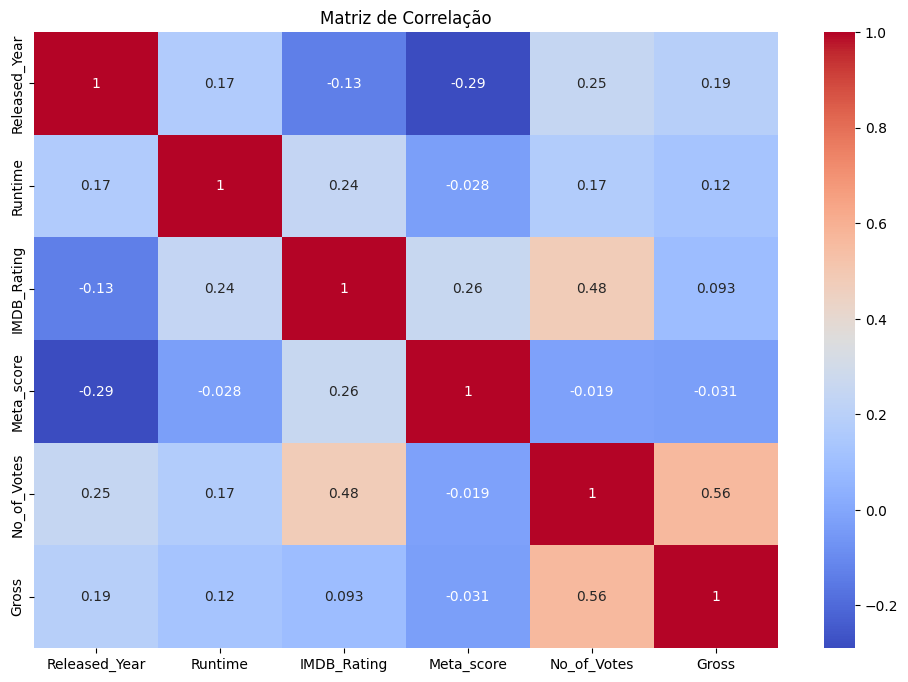

In [13]:
# Plot 3: Matriz de Correlação
plt.figure(figsize=(12, 8))
numeric_cols = df.select_dtypes(include=["int64", "float64"])
correlation_matrix = numeric_cols.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Matriz de Correlação")
plt.show()

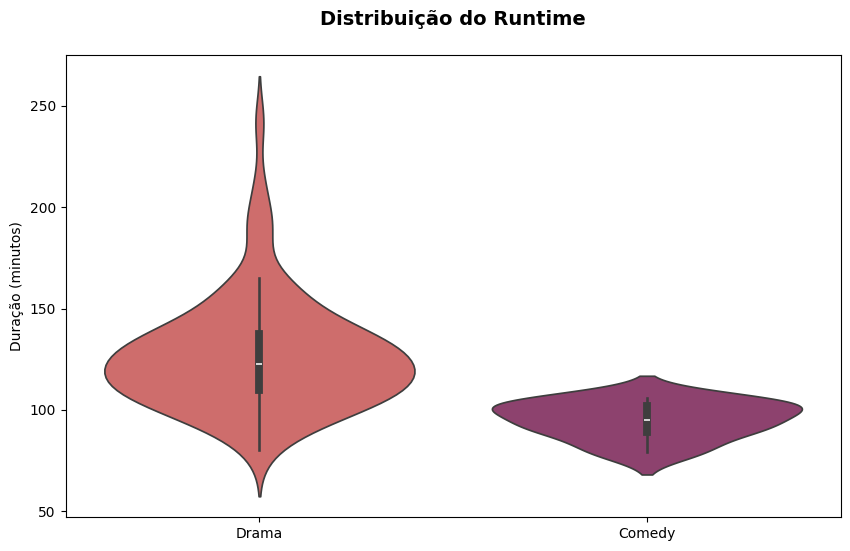

In [14]:
# Filtrando os dados para PLOT
violin_data = df[df['Genre'].isin(['Drama', 'Comedy'])]

# Plot da distribuição de "runtime" por gênero
plt.figure(figsize=(10,6))
sns.violinplot(data=violin_data, x='Genre', y='Runtime', palette="flare")

plt.title("Distribuição do Runtime\n", fontsize=14, fontweight='bold')
plt.xlabel("")
plt.ylabel("Duração (minutos)")
plt.show()

## 2) Respostas às Perguntas Específicas

### a) Qual filme você recomendaria para uma pessoa que você não conhece?

Para recomendação de um filme para uma pessoa desconhecida, acredito que a abordagem mais segura e correta é escolher um filme com uma boa avaliação ou universalmente aclamado, pois, isso aumentará a chance de ser bem recebido. 

Seguirei este raciocínio para a recomendar o filme, como podemos ver abaixo:

In [15]:
recomendacao = df.loc[df["IMDB_Rating"].idxmax()]           # Retornará o maior rating

print(f"Filme recomendado: {recomendacao["Series_Title"]}")

Filme recomendado: The Godfather


## b) Quais são os principais fatores que estão relacionados com alta expectativa de faturamento de um filme?

Como vimos acima, segundo a matriz de Correlação, a coluna "GROSS" está diretamente ligada a coluna "No_of_Votes", abaixo, mostrarei novamente a matriz de confusão, em formato de texto.

In [16]:
numeric_cols = df.select_dtypes(include=["int64", "float64"])
correlation_matrix = numeric_cols.corr()

print("Principais fatores relacionados ao faturamento (correlação com Gross):")
print(correlation_matrix["Gross"].sort_values(ascending=False))

Principais fatores relacionados ao faturamento (correlação com Gross):
Gross            1.000000
No_of_Votes      0.563484
Released_Year    0.192868
Runtime          0.124919
IMDB_Rating      0.092968
Meta_score      -0.030809
Name: Gross, dtype: float64


**Análise dos Fatores de Faturamento:**

*   **No_of_Votes (Número de Votos):** Apresenta a correlação mais forte e positiva com o faturamento. Isso é intuitivo, pois filmes populares tendem a ter mais votos e, consequentemente, maior arrecadação.
*   **Released_Year (Ano de Lançamento):** Correlação positiva moderada. Filmes mais recentes podem se beneficiar de mercados maiores, inflação e tecnologias de distribuição mais amplas.
*   **Runtime (Duração):** Correlação positiva, mas fraca. Filmes mais longos podem ser produções de maior escala, que tendem a atrair mais público.
*   **IMDB_Rating (Nota do IMDB):** Correlação positiva, mas muito fraca. Embora a qualidade seja importante, outros fatores como marketing e apelo comercial parecem ter um impacto maior no faturamento.
*   **Meta_score:** Correlação negativa e muito fraca. Isso sugere que a avaliação da crítica especializada, por si só, não é um forte preditor de faturamento.

## c) Quais insights podem ser tirados com a coluna Overview? É possível inferir o gênero do filme a partir dessa coluna?

Neste dataset, a coluna "Overview" contem a sinopse do filme, possuindo um texto descritivo. Desta coluna, podemos tirar os seguintes insights:

- **Temas e tópicos** -> A sinopse revela os temas centrais, o enredo principal, os personagens e os conflitos abordados no filme. Isso pode fornecer uma compreensão rica do conteúdo do filme que não é capturada por outras variáveis categóricas ou numéricas.

- **Sentimento e Tom:** Através da análise de texto, é possível inferir o tom do filme (por exemplo, dramático, cômico, tenso, inspirador) e o sentimento geral (positivo, negativo, neutro) que ele busca evocar.

- **Palavras-chave e Conceitos:** Extrair palavras-chave e conceitos frequentes pode ajudar a identificar elementos recorrentes em filmes de sucesso ou em filmes com certas características.

Sim, é **altamente possível** inferir o gênero do filme a partir da coluna "Overview", embora não seja uma tarefa trivial e exija técnicas de Processamento de Linguagem Natural (PLN). A sinopse frequentemente contém termos, frases e estruturas narrativas que são características de gêneros específicos. Por exemplo:

*   Filmes de **ação** podem conter palavras como "perseguição", "explosão", "combate", "herói".
*   Filmes de **romance** podem ter "amor", "relacionamento", "coração partido", "encontro".
*   Filmes de **terror** podem incluir "medo", "assombrado", "mistério", "psicológico".

Para isso, seriam necessárias técnicas como tokenização, vetorização de texto (TF-IDF, Word Embeddings), e modelos de classificação de texto (Naive Bayes, SVM, Redes Neurais). A complexidade reside na ambiguidade da linguagem natural e na possibilidade de um filme pertencer a múltiplos gêneros.

## 3) Previsão da Nota do IMDB e Variáveis Utilizadas

Para prever a nota do IMDB, estamos resolvendo um problema de **regressão**, pois a variável alvo (`IMDB_Rating`) é um valor contínuo (pode assumir qualquer valor dentro de um intervalo, como 7.8, 8.5, 9.3, etc.).

As variáveis utilizadas para o modelo e suas transformações serão:

-   **Meta_score:** Utilizada diretamente como uma variável numérica. É a pontuação do Metacritic, que agrega críticas profissionais e tem uma correlação positiva com a nota do IMDB. Incluímos essa variável porque ela representa uma avaliação externa e consolidada da qualidade do filme.

-   **No_of_Votes:** Utilizada diretamente como uma variável numérica. O número de votos é um indicador da popularidade e do engajamento do público com o filme. Filmes mais populares e bem avaliados tendem a receber mais votos e, muitas vezes, mais altas.

-   **Runtime:** Utilizada diretamente como uma variável numérica. A duração do filme pode ter uma influência, embora menor, na percepção da qualidade ou no tipo de filme (filmes mais longos podem ser épicos ou dramáticos, por exemplo).

*   **Gross:** Utilizada diretamente como uma variável numérica. O faturamento bruto do filme pode estar relacionado à sua popularidade e, indiretamente, à sua recepção. Embora a correlação linear direta com a nota do IMDB não seja muito forte, um modelo mais complexo pode capturar relações não lineares.

*   **Genre:** Esta é uma variável categórica que descreve o(s) gênero(s) do filme. Para utilizá-la em modelos de machine learning, aplicamos a transformação **One-Hot Encoding**. Isso cria novas colunas binárias para cada gênero único presente no dataset (por exemplo, `Genre_Drama`, `Genre_Action`, `Genre_Comedy`, etc.). Se um filme é de um determinado gênero, a coluna correspondente terá o valor 1; caso contrário, 0. Isso permite que o modelo capture a influência de cada gênero na nota do IMDB.

*   **Certificate:** Similar ao `Genre`, a classificação indicativa (`Certificate`) é uma variável categórica. Também aplicamos **One-Hot Encoding** a esta variável. Isso ajuda o modelo a entender se a classificação etária de um filme (por exemplo, 'A', 'PG', 'R') tem alguma relação com a sua nota no IMDB.

As variáveis `Series_Title`, `Released_Year`, `Overview`, `Director` e as estrelas (`Star1`, `Star2`, `Star3`, `Star4`) não foram utilizadas no modelo inicial. `Series_Title` é um identificador único e não contribui para a previsão. `Released_Year` foi convertida para numérica, mas sua correlação direta com a nota do IMDB é baixa e pode introduzir complexidade desnecessária para um modelo inicial. `Overview` exigiria técnicas avançadas de Processamento de Linguagem Natural (NLP) para extrair características úteis, o que está além do escopo de um modelo básico. As variáveis de `Director` e `Star`s possuem muitas categorias únicas, o que poderia levar a um número excessivo de colunas após o One-Hot Encoding, tornando o modelo muito complexo, propenso a overfitting e difícil de interpretar.

## 4) Modelo, Prós e Contras e Medida de Performance

Para este problema de regressão, utilizei o modelo **Random Forest Regressor**.

### Prós do Random Forest Regressor:

*   **Alta Precisão:** Geralmente, o Random Forest oferece alta precisão e bom desempenho em uma variedade de problemas de regressão e classificação.
*   **Robustez a Outliers:** É menos sensível a outliers nos dados, pois cada árvore na floresta é treinada em uma amostra diferente dos dados.
*   **Lida Bem com Dados Não Lineares:** Consegue capturar relações não lineares entre as variáveis, o que é comum em dados do mundo real.
*   **Lida com Variáveis Categóricas (após One-Hot Encoding):** Funciona bem com as variáveis categóricas transformadas por One-Hot Encoding.
*   **Importância das Features:** Permite avaliar a importância de cada feature na previsão, o que pode fornecer insights adicionais sobre os dados.
*   **Menos Propenso a Overfitting (em comparação com árvores de decisão individuais):** A combinação de múltiplas árvores de decisão (floresta) e o uso de bagging (amostragem com reposição) reduzem o risco de overfitting.

### Contras do Random Forest Regressor:

*   **Complexidade e Interpretabilidade:** Embora seja poderoso, o modelo é uma "caixa preta" em comparação com modelos mais simples como a regressão linear. É mais difícil entender como uma previsão específica é feita.
*   **Custo Computacional:** Pode ser computacionalmente intensivo e demorado para treinar em grandes datasets ou com um grande número de árvores.
*   **Overfitting em Dados Ruidosos:** Embora menos propenso que árvores individuais, ainda pode overfitar se o número de árvores for muito alto ou se os dados forem excessivamente ruidosos.

### Medidas de Performance do Modelo:

Para avaliar a performance do modelo, escolhi duas métricas principais:

1.  **Mean Squared Error (MSE):** O Erro Quadrático Médio calcula a média dos erros ao quadrado entre os valores previstos e os valores reais. Foi escolhido por ser uma métrica padrão para problemas de regressão que penaliza erros maiores de forma mais significativa. Um MSE baixo indica que o modelo está fazendo previsões mais precisas.
2.  **R-squared (R²):** O Coeficiente de Determinação (R²) mede a proporção da variância na variável dependente (a nota do IMDB) que é previsível a partir das variáveis independentes (as features do modelo). Ele varia de 0 a 1, onde 1 indica que o modelo explica toda a variabilidade dos dados. Foi escolhido por fornecer uma medida relativa da qualidade do ajuste do modelo.

In [17]:
# Import da Bibliotecas para treinamento e métricas de avaliação


from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [18]:
# Antes do treinamento do modelo, irei utilizar o One-Hot encoding para as seguintes colunas:

# Feature Engineering (One-Hot Encoding para 'Genre' e 'Certificate')
df_encoded = pd.get_dummies(df, columns=["Genre", "Certificate"], drop_first=True)

In [19]:
# Após isso, irei definir as features e target (IMDB_Rating)


# Definir features (X) e target (y)
X = df_encoded[["Meta_score", "No_of_Votes", "Runtime", "Gross"] + [col for col in df_encoded.columns if "Genre_" in col or "Certificate_" in col]]         # Features

y = df_encoded["IMDB_Rating"]           # Target

In [20]:
# Dividir os dados em conjuntos de treino (30%) e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [21]:
# Treinamento do modelo (RandomForestRegressor)

model = RandomForestRegressor(n_estimators=100, random_state=42)

model.fit(X_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [22]:
# Avaliação do modelo

y_pred = model.predict(X_test)          # Realização de predições na base de teste

In [23]:
# Métricas de avaliação

mse = mean_squared_error(y_test, y_pred)            # Mean Squared Error
r2 = r2_score(y_test, y_pred)                       # r² score


print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R-squared (R2): {r2:.4f}")

Mean Squared Error (MSE): 0.0417
R-squared (R2): 0.4618


## Qual seria a nota do IMDB para o filme 'The Shawshank Redemption'?

Vamos usar o modelo treinado para prever a nota do IMDB para o filme 'The Shawshank Redemption' com as características fornecidas.

Agora, poderei usar o modelo treinado para prever a nota do IMD para o filme "The Shawshank Redemption" com as características fornecidas anteriormente. 

Para eu poder testar o modelo, usei a seguinte entrada tratada:

Como podemos ver abaixo:

In [24]:
# Dados do filme 'The Shawshank Redemption'
shawshank_data = {
    'Series_Title': 'The Shawshank Redemption',
    'Released_Year': '1994',
    'Certificate': 'A',
    'Runtime': '142 min',
    'Genre': 'Drama',
    'Overview': 'Two imprisoned men bond over a number of years, finding solace and eventual redemption through acts of common decency.',
    'Meta_score': 80.0,
    'Director': 'Frank Darabont',
    'Star1': 'Tim Robbins',
    'Star2': 'Morgan Freeman',
    'Star3': 'Bob Gunton',
    'Star4': 'William Sadler',
    'No_of_Votes': 2343110,
    'Gross': '28,341,469'
}

# Criar um DataFrame para o filme específico
shawshank_df = pd.DataFrame([shawshank_data])

# Aplicar os mesmos passos de pré-processamento
shawshank_df["Gross"] = shawshank_df["Gross"].astype(str).str.replace(",", "").astype(float)

shawshank_df["Runtime"] = shawshank_df["Runtime"].str.replace(" min", "").astype(int)

shawshank_df["Certificate"] = shawshank_df["Certificate"].fillna("Unknown")

shawshank_df["Meta_score"] = shawshank_df["Meta_score"].fillna(df["Meta_score"]    .mean()) # Usar a média do df original

shawshank_df["Released_Year"] = pd.to_numeric(shawshank_df["Released_Year"], errors="coerce")

shawshank_df["Gross"] = shawshank_df["Gross"].fillna(df["Gross"].mean()) # Usar a média do df original

# Aplicar One-Hot Encoding usando as colunas do df de treino original
shawshank_encoded = pd.get_dummies(shawshank_df, columns=["Genre", "Certificate"], drop_first=True)

# Alinhar colunas - adicionar colunas ausentes do treino, preencher com 0
missing_cols = set(X.columns) - set(shawshank_encoded.columns)
for c in missing_cols:
    shawshank_encoded[c] = 0

# Garantir que a ordem das colunas seja a mesma do treino
shawshank_final = shawshank_encoded[X.columns]

# Fazer a previsão
shawshank_prediction = model.predict(shawshank_final)
print(f"Previsão da nota do IMDB para 'The Shawshank Redemption': {shawshank_prediction[0]:.2f}")

Previsão da nota do IMDB para 'The Shawshank Redemption': 8.77


## 5) Salvando o Modelo

Para salvar o modelo, irei utilizar o JOBLIB, para criar um modelo utilizavel, no formato `.pkl` para uso futuro.

In [25]:
import joblib           # import do joblib para criação do modelo

In [26]:
import os
import joblib

# Verificar se a pasta 'models' existe, caso contrário, criar
if not os.path.exists('models'):
    os.makedirs('models')

# Salvar o modelo na pasta 'models'
joblib.dump(model, "models/imdb_rating_model.pkl")

print("Modelo salvo como imdb_rating_model.pkl")

Modelo salvo como imdb_rating_model.pkl
